In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Official deaths daily']]
data.columns = ['ds', 'y']

In [4]:
data['floor'] = 0
data['cap'] = 50

# Modeling

### Model creation

In [5]:
model_args = {
    'changepoint_prior_scale': 0.95,
    'growth': 'logistic',
    'weekly_seasonality': 20,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [6]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = model.make_future_dataframe(periods = 1)
future['floor'] = 0
future['cap'] = 50

forecast = model.predict(future)

In [8]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
68,2020-06-13,15.0,12.032207,4.474277,20.001492
69,2020-06-14,10.0,8.221206,0.478655,15.950972
70,2020-06-15,9.0,10.982534,3.050910,18.581917
71,2020-06-16,16.0,17.336072,9.885632,24.240810
72,2020-06-17,14.0,17.780629,10.434374,25.598969
73,2020-06-18,30.0,15.497984,7.988354,23.055443
74,2020-06-19,18.0,14.579020,7.148667,21.467728
75,2020-06-20,12.0,12.734161,5.487841,20.334531
76,2020-06-21,10.0,8.923864,1.866548,16.744539
77,2020-06-22,NaN,11.685873,4.185035,19.167758


### Model explanation

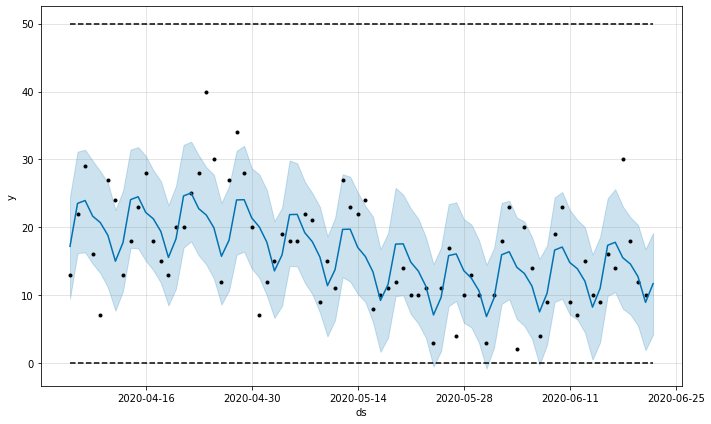

In [9]:
fig = model.plot(forecast)

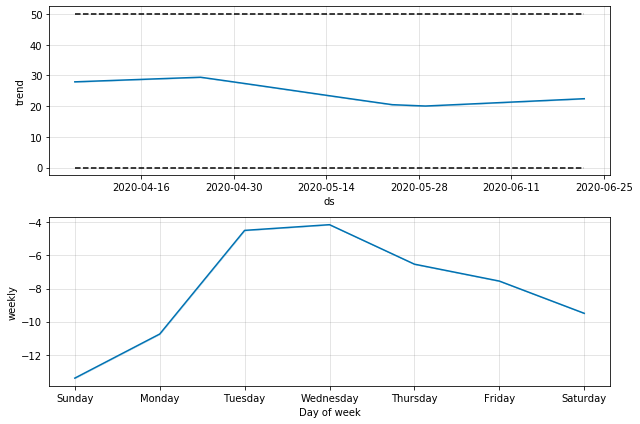

In [10]:
fig = model.plot_components(forecast)

### Model performance

In [11]:
results = cross_validation(model, initial = '65 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2020-06-10 00:00:00 and 2020-06-20 00:00:00


In [12]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,10.195622,2.794100,17.782869,9.0,2020-06-10
1,2020-06-12,10.279220,2.011606,17.813557,7.0,2020-06-11
2,2020-06-13,7.395941,-0.266226,15.064730,15.0,2020-06-12
3,2020-06-14,3.673576,-4.210004,11.786340,10.0,2020-06-13
4,2020-06-15,8.774073,1.469039,16.413252,9.0,2020-06-14
5,2020-06-16,14.962769,7.496659,22.727310,16.0,2020-06-15
6,2020-06-17,15.651056,8.160266,22.950796,14.0,2020-06-16
7,2020-06-18,11.226542,4.234135,18.514947,30.0,2020-06-17
8,2020-06-19,13.639884,6.273374,21.064801,18.0,2020-06-18
9,2020-06-20,12.517993,4.618413,20.923893,12.0,2020-06-19


In [13]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,44.311665,6.656701,4.211116,0.272277,0.135117,0.909091


### Tomorrow prediction

In [14]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

12